In [5]:
import pandas as pd
import seaborn as sns
import matplotlib as plt


In [2]:
df=pd.read_csv("transformed_data.csv")
df

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [3]:
df["airline"].value_counts()


airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

/var/folders/mq/8k37xryj0_n2cz69zl90f1gm0000gn/T/ipykernel_1602/1646776005.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='airline',y='price',data=df,palette='pastel')


<Axes: xlabel='airline', ylabel='price'>

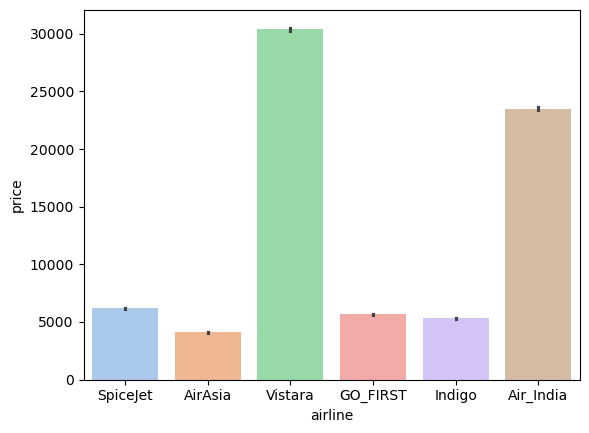

In [12]:
sns.barplot(x='airline',y='price',data=df,palette='pastel')

In [6]:
df["class"].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

/var/folders/mq/8k37xryj0_n2cz69zl90f1gm0000gn/T/ipykernel_1602/1750738486.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette=['skyblue','orange'])


<Axes: xlabel='class', ylabel='count'>

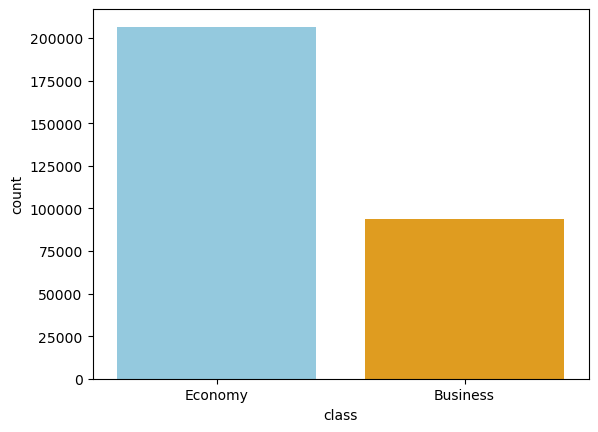

In [7]:
sns.countplot(x='class', data=df, palette=['skyblue','orange'])

In [13]:
df['source_city'].value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [14]:
df['destination_city'].value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [20]:
counts = df.groupby(['airline','class']).size().unstack()

AttributeError: module 'matplotlib' has no attribute 'title'

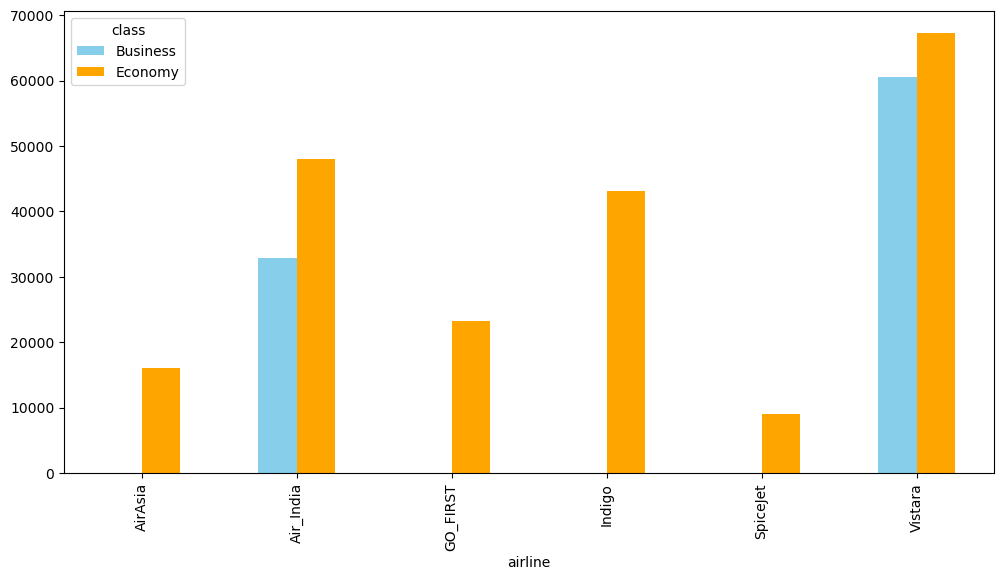

In [21]:
counts.plot(kind='bar', figsize=(12,6), color=['skyblue','orange'])
plt.title('Number of Flights by Class (Economy vs Business) per Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.legend(title='Class')
plt.show()

In [22]:
df.groupby(['source_city','destination_city']).size().sort_values(ascending=False)


source_city  destination_city
Delhi        Mumbai              15289
Mumbai       Delhi               14809
Delhi        Bangalore           14012
Bangalore    Delhi               13756
             Mumbai              12939
Mumbai       Bangalore           12885
             Kolkata             12602
Delhi        Kolkata             11934
Kolkata      Mumbai              11467
Delhi        Chennai             10780
Kolkata      Delhi               10506
Mumbai       Hyderabad           10470
             Chennai             10130
Hyderabad    Mumbai              10064
Bangalore    Kolkata             10028
Kolkata      Bangalore            9824
Chennai      Delhi                9783
             Mumbai               9338
Delhi        Hyderabad            9328
Bangalore    Hyderabad            8928
Hyderabad    Delhi                8506
             Kolkata              7987
Kolkata      Hyderabad            7897
Hyderabad    Bangalore            7854
Chennai      Kolkata              

In [23]:
df.groupby(['airline','source_city','destination_city'])['price'].mean().sort_values()


airline   source_city  destination_city
GO_FIRST  Chennai      Hyderabad            1613.105263
AirAsia   Chennai      Bangalore            1914.760870
GO_FIRST  Hyderabad    Chennai              1942.263158
AirAsia   Chennai      Hyderabad            2053.182540
          Bangalore    Chennai              2073.043478
                                               ...     
Vistara   Bangalore    Mumbai              34961.383271
          Mumbai       Bangalore           35029.880315
                       Kolkata             35223.862417
          Delhi        Kolkata             35702.441732
          Bangalore    Kolkata             35746.714874
Name: price, Length: 177, dtype: float64